# Proyek UTS PMDPM Gasal 2023/2024

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

- Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM Gasal 2023/2024

- Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan.
- Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing dan encoding, modelling, dan evaluasi model.

- Pada bagian akhir silahkan berikan laporan singkat berupa jawaban pertanyaan dari proyek yang sudah dikerjakan.

### Inisialisasi

- Bagian berikut berisi import library yang dibutuhkan

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile,RFE
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from google.colab import drive

### Data Loading

- Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [6]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/Dataset UTS.csv'
df_property = pd.read_csv(path)
df_property.head(10)

Mounted at /content/drive


,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **klasifikasi**, pastikan **Kategori menjadi target** dan **kolom Harga dihapus**.

In [7]:
df_property2 = df_property.drop('price', axis=1)
df_property2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,Luxury


In [8]:
df_property2.value_counts().head()

squaremeters  numberofrooms  hasyard  haspool  floors  citycode  citypartrange  numprevowners  made  isnewbuilt  hasstormprotector  basement  attic  garage  hasstorageroom  hasguestroom  category
89            33             no       no       72      61648     3              4              1995  old         yes                3114      1258   264     yes             9             Basic       1
66289         69             yes      yes      14      96579     2              5              2000  new         no                 9744      2695   890     no              2             Middle      1
66222         7              no       yes      99      96233     8              2              2001  new         no                 6361      9076   140     yes             6             Middle      1
66258         9              yes      yes      84      52280     9              10             2015  new         no                 376       1581   428     no              2             Middle      1


#### Cek apakah ada data null, kosong, atau NaN menggunakan fungsi isnull(), empty, dan isna() dari DataFrame Pandas.

In [9]:
print("data null \n",df_property2.isnull().sum())
print("data kosong \n",df_property2.empty)
print("data nan \n",df_property2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


#### Pengecekan data duplikat

In [10]:
print("Sebelum pengecekan data duplikat",df_property2.shape)
cols_to_check = ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector',
       'hasstorageroom', 'category', 'squaremeters', 'numberofrooms', 'floors', 'citycode', 'citypartrange',
       'numprevowners', 'made', 'basement', 'attic', 'garage', 'hasguestroom']

df_property_check = df_property2[~df_property2[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat",df_property_check.shape)

Sebelum pengecekan data duplikat (10000, 17)
Sesudah pengecekan data duplikat (10000, 17)


##### DATA ENCODING

Mencari tahu tipe data setiap kolom

In [11]:
kategorik = df_property2.select_dtypes(include=['object']).columns
print("Data Kategorik: \n",kategorik)

numerik = df_property2.select_dtypes(include=['int64','float64']).columns
print("\nData numerik: \n",numerik)

Data Kategorik: 
 Index(['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector',
       'hasstorageroom', 'category'],
      dtype='object')

Data numerik: 
 Index(['squaremeters', 'numberofrooms', 'floors', 'citycode', 'citypartrange',
       'numprevowners', 'made', 'basement', 'attic', 'garage', 'hasguestroom'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_property2.select_dtypes(include=["object"]).columns:
    df_property2[col] = le.fit_transform(df_property2[col])

df_property2.head(10).style.background_gradient(cmap="Blues")

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,0,1,63,9373,3,8,2005,1,1,4313,9005,956,0,7,1
1,55712,58,0,1,19,34457,6,8,2021,1,0,2937,8852,135,1,9,2
2,86929,100,1,0,11,98155,3,4,2003,0,0,6326,4748,654,0,10,1
3,51522,3,0,0,61,9047,8,3,2012,0,1,632,5792,807,1,5,2
4,96470,74,1,0,21,92029,4,2,2011,0,1,5414,1172,716,1,9,1
5,79770,3,0,1,69,54812,10,5,2018,1,1,8871,7117,240,0,7,1
6,75985,60,1,0,67,6517,6,9,2009,0,1,4878,281,384,1,5,1
7,64169,88,0,1,6,61711,3,9,2011,0,1,3054,129,726,0,9,2
8,92383,12,0,0,78,71982,3,7,2000,1,0,7507,9056,892,1,1,1
9,95121,46,0,1,3,9382,7,9,1994,1,0,615,1221,328,0,10,1


In [14]:
df_property2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squaremeters       10000 non-null  int64
 1   numberofrooms      10000 non-null  int64
 2   hasyard            10000 non-null  int64
 3   haspool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   citycode           10000 non-null  int64
 6   citypartrange      10000 non-null  int64
 7   numprevowners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isnewbuilt         10000 non-null  int64
 10  hasstormprotector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasstorageroom     10000 non-null  int64
 15  hasguestroom       10000 non-null  int64
 16  category           10000 non-null  int64
dtypes: int64(17)


Mengelompokkan data numerik dan kategorik

In [15]:
kategorik = df_property2.select_dtypes(include=['object']).columns
print("Data Kategorik: \n",kategorik)

numerik = df_property2.select_dtypes(include=['int64','float64']).columns
print("\nData numerik: \n",numerik)

Data Kategorik: 
 Index([], dtype='object')

Data numerik: 
 Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'category'],
      dtype='object')


Mengubah data kateogrik ke numerik

### Train-test split

- Untuk nilai parameter random_state, sesuaikan dengan dua digit terakhir nomor pegawai terbesar (red: dua digit terakhir NPM terbesar).
- Silahkan memodifikasi persentase train-test split terbaik antara 80:20, 75:25, atau 70:30.

In [16]:
X = df_property2.drop(columns=['category'])
y = df_property2.category

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=97)
print(X_train.shape)
print(X_test.shape)

(7000, 16)
(3000, 16)


### Modelling

#### Tugas Klasifikasi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Tahap pemodelan dimulai dari data scaling, feature selection, hingga algoritme classifier.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian perlu bereksperimen dengan membandingkan dua dari empat metode feature selection (SelectKBest, SelectPercentile, SelectFromModel, dan RFE) dan jumlah feature yang dipilih menggunakan parameter grid.
- Kalian wajib menyesuaikan parameter dari algoritme classifier yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme classifier yang dibandingkan bebas.

### KNN

In [17]:
pipe_1_KNN = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select',SelectKBest(k='all')),
    ('clf',KNeighborsClassifier())
])

param_grid_KNN= [
    {'feat_select__k': np.arange(2,5),
     'clf__n_neighbors': [3, 5, 7, 9],
     'clf__weights': ['uniform', 'distance'],
     'clf__p': [1, 2]},
    {
      'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=97,max_depth=3),max_features=8)],
      'clf__n_neighbors': [3, 5, 7, 9],
      'clf__weights': ['uniform', 'distance'],
      'clf__p': [1, 2]
    }
]

GSCV_KNN = GridSearchCV(pipe_1_KNN, param_grid_KNN,cv=StratifiedKFold(n_splits=5))
GSCV_KNN.fit(X_train,y_train)

mask = GSCV_KNN.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_KNN.best_estimator_))
print("Selected features:{}".format(X.columns[mask]))

print("Best CV score: {:.10f}".format(GSCV_KNN.best_score_))
print("Test set score: {:.10f}".format(GSCV_KNN.score(X_test,y_test)))

Best model:Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf',
                 KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'))])
Selected features:Index(['squaremeters', 'hasyard', 'haspool', 'isnewbuilt'], dtype='object')
Best CV score: 0.9987142857
Test set score: 0.9976666667


### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_2_GBT = Pipeline(steps=[
    ('scale',MinMaxScaler()),
    ('feat_select',SelectKBest()),
    ('clf',GradientBoostingClassifier(random_state=97))])

param_grid_GBT = [
    {'feat_select__k': np.arange(2,5),
     'clf__n_estimators': [100,150],
     'clf__learning_rate': [0.01,0.1,1]
    },
    {
      'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=97),max_features=10)],
      'clf__n_estimators': [100,150],
      'clf__learning_rate': [0.01,0.1,1]
    }
]

GSCV_GBT = GridSearchCV(pipe_2_GBT, param_grid_GBT, cv=StratifiedKFold(n_splits=5))
GSCV_GBT.fit(X_train, y_train)

mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_GBT.best_estimator_))
print("Selected features:{}".format(X.columns[mask]))

print("Best CV score: {:.10f}".format(GSCV_GBT.best_score_))
print("Test set score: {:.10f}".format(GSCV_GBT.score(X_test,y_test)))

Best model:Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf', GradientBoostingClassifier(random_state=97))])
Selected features:Index(['squaremeters', 'hasyard', 'haspool', 'isnewbuilt'], dtype='object')
Best CV score: 0.9992857143
Test set score: 0.9996666667


### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk klasifikasi, tampilkan feature yang relevan dipilih oleh model, hasil pengukuran kinerja model klasifikasi dengan confusion matrix, serta metrik accuracy, precision, recall, dan F1-score. Untuk memudahkan pimpinan divisi membaca hasil, buatlah confusion matrix dalam bentuk representasi visual menggunakan fungsi ConfusionMatrixDisplay dari library scikit-learn.**

#### Evaluasi Model KNN

In [19]:
pred = GSCV_KNN.predict(X_test)

print("Confusion matrix KNN: \n", confusion_matrix(y_test, pred))
print("Classification report KNN: \n", classification_report(y_test, pred, zero_division=0))


Confusion matrix KNN: 
 [[1290    0    6]
 [   0  918    0]
 [   0    1  785]]
Classification report KNN: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1296
           1       1.00      1.00      1.00       918
           2       0.99      1.00      1.00       786

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



#### Evaluasi Model Gradient Boosting

In [20]:
pred = GSCV_GBT.predict(X_test)

print("Confusion matrix GBT:\n",confusion_matrix(y_test,pred))
print("Classification report GBT:\n",classification_report(y_test,pred,zero_division=0))

Confusion matrix GBT:
 [[1296    0    0]
 [   0  918    0]
 [   0    1  785]]
Classification report GBT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1296
           1       1.00      1.00      1.00       918
           2       1.00      1.00      1.00       786

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### Data Cleansing & Encoding Regresi

- Load kembali dataset yang akan digunakan.
- Ubah data kategorik string menjadi numerik.
- Untuk **regresi**, pastikan **Harga menjadi target** dan **kolom Kategori dihapus**.

In [22]:
df_property_regresi = pd.read_csv(path)
df_property_regresi.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


### Encoding

In [23]:
kategorik = df_property_regresi.select_dtypes(include=['object']).columns
print("Data Kategorik: \n",kategorik)

numerik = df_property_regresi.select_dtypes(include=['int64','float64']).columns
print("\nData numerik: \n",numerik)

Data Kategorik: 
 Index(['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector',
       'hasstorageroom', 'category'],
      dtype='object')

Data numerik: 
 Index(['squaremeters', 'numberofrooms', 'floors', 'citycode', 'citypartrange',
       'numprevowners', 'made', 'basement', 'attic', 'garage', 'hasguestroom',
       'price'],
      dtype='object')


In [24]:
le = LabelEncoder()
for col in df_property_regresi.select_dtypes(include=["object"]).columns:
    df_property_regresi[col] = le.fit_transform(df_property_regresi[col])

df_property_regresi.head(10).style.background_gradient(cmap="Blues")

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,0,1,63,9373,3,8,2005,1,1,4313,9005,956,0,7,7559081.500000,1
1,55712,58,0,1,19,34457,6,8,2021,1,0,2937,8852,135,1,9,5574642.100000,2
2,86929,100,1,0,11,98155,3,4,2003,0,0,6326,4748,654,0,10,8696869.300000,1
3,51522,3,0,0,61,9047,8,3,2012,0,1,632,5792,807,1,5,5154055.200000,2
4,96470,74,1,0,21,92029,4,2,2011,0,1,5414,1172,716,1,9,9652258.100000,1
5,79770,3,0,1,69,54812,10,5,2018,1,1,8871,7117,240,0,7,7986665.800000,1
6,75985,60,1,0,67,6517,6,9,2009,0,1,4878,281,384,1,5,7607322.900000,1
7,64169,88,0,1,6,61711,3,9,2011,0,1,3054,129,726,0,9,6420823.100000,2
8,92383,12,0,0,78,71982,3,7,2000,1,0,7507,9056,892,1,1,9244344.000000,1
9,95121,46,0,1,3,9382,7,9,1994,1,0,615,1221,328,0,10,9515440.400000,1


Drop Category

In [29]:
df_property_regresi2 = df_property_regresi.drop('category', axis=1)
df_property_regresi2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,0,1,63,9373,3,8,2005,1,1,4313,9005,956,0,7,7559081.5
1,55712,58,0,1,19,34457,6,8,2021,1,0,2937,8852,135,1,9,5574642.1
2,86929,100,1,0,11,98155,3,4,2003,0,0,6326,4748,654,0,10,8696869.3
3,51522,3,0,0,61,9047,8,3,2012,0,1,632,5792,807,1,5,5154055.2
4,96470,74,1,0,21,92029,4,2,2011,0,1,5414,1172,716,1,9,9652258.1
5,79770,3,0,1,69,54812,10,5,2018,1,1,8871,7117,240,0,7,7986665.8
6,75985,60,1,0,67,6517,6,9,2009,0,1,4878,281,384,1,5,7607322.9
7,64169,88,0,1,6,61711,3,9,2011,0,1,3054,129,726,0,9,6420823.1
8,92383,12,0,0,78,71982,3,7,2000,1,0,7507,9056,892,1,1,9244344.0
9,95121,46,0,1,3,9382,7,9,1994,1,0,615,1221,328,0,10,9515440.4


### Train-test-split

In [30]:
X_regress = df_property_regresi2.drop('price',axis=1)
y_regress = df_property_regresi2.price

X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_regress,y_regress,\
                                                                    test_size=0.2,
                                                                    random_state=97)

#### Tugas Regresi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian juga perlu menyesuaikan parameter dari algoritme regressor yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme regressor yang dibandingkan bebas.

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_LR = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('reg',LinearRegression())
    ])

param_grid_LR = {
}


GSCV_LR = GridSearchCV(pipe_LR,param_grid_LR, cv=5, scoring='neg_mean_squared_error', error_score='raise')
GSCV_LR.fit(X_train_ins, y_train_ins)

print("Best model:{}".format(GSCV_LR.best_estimator_))
print("Koefisien/bobot:{}".format(GSCV_LR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_LR.best_estimator_.named_steps['reg'].intercept_))

LR_pred = GSCV_LR.predict(X_test_ins)

mae_LR = mean_absolute_error(y_test_ins, LR_pred)
mse_LR = mean_squared_error(y_test_ins, LR_pred)


print("LR MAE:",mae_LR)
print("LR MSE:",mse_LR)
print("LR Root Mean Squared Error:",np.sqrt(mse_LR))

Best model:Pipeline(steps=[('scale', StandardScaler()), ('reg', LinearRegression())])
Koefisien/bobot:[ 2.87516085e+06  1.03924769e+01  1.48614109e+03  1.47820438e+03
  1.59836246e+03 -2.05927988e+01  1.40948736e+02  6.33472000e+00
 -3.03719934e+01 -8.52920931e+01  6.36052643e+01 -1.33363726e+01
 -2.48665097e+01  2.71783676e+01  6.13298505e+00 -2.57443286e+01]
Intercept/bias:4991254.957787501
LR MAE: 1480.714555026873
LR MSE: 3603814.826433222
LR Root Mean Squared Error: 1898.3716249547194


### Lasso Regression

In [35]:
pipe_Lasso = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('reg',Lasso(max_iter=1000))
    ])

param_grid_Lasso = {
    'reg__alpha':[0.01,0.1,1,10,100]
}


GSCV_Lasso = GridSearchCV(pipe_Lasso,param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')
GSCV_Lasso.fit(X_train_ins, y_train_ins)

print("Best model:{}".format(GSCV_Lasso.best_estimator_))
print("Koefisien/bobot:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

Lasso_pred = GSCV_Lasso.predict(X_test_ins)

mse_Lasso = mean_squared_error(y_test_ins, Lasso_pred)
mae_Lasso = mean_absolute_error(y_test_ins, Lasso_pred)

print("Lasso MAE:",mae_Lasso)
print("Lasso MSE:",mse_Lasso)
print("Lasso Root Mean Squared Error:",np.sqrt(mse_Lasso))

Best model:Pipeline(steps=[('scale', StandardScaler()), ('reg', Lasso(alpha=10))])
Koefisien/bobot:[ 2.87515080e+06  9.62013365e-01  1.47610043e+03  1.46870032e+03
  1.58880672e+03 -1.05617958e+01  1.31396531e+02  0.00000000e+00
 -2.02771016e+01 -7.48125713e+01  5.38949489e+01 -3.59832848e+00
 -1.46891306e+01  1.80945186e+01  0.00000000e+00 -1.60006879e+01]
Intercept/bias:4991254.957787501
Lasso MAE: 1479.4930302467915
Lasso MSE: 3601197.2462772294
Lasso Root Mean Squared Error: 1897.6820719702312


### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk regresi, tampilkan hasil pengukuran kinerja model regresi dengan Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error. Untuk memudahkan pimpinan divisi membaca hasil, buatlah tabel yang menampilkan perbandingan harga asli properti dan harga hasil prediksi dua model regresi beserta grafik visualnya.**

In [37]:
df_results = pd.DataFrame(y_test_ins)
df_results['LR prediction']=LR_pred
df_results['Lasso prediction'] = Lasso_pred
df_results['LR MAE'] = mae_LR
df_results['LR MSE'] = mse_LR
df_results['LR RMSE'] = np.sqrt(mse_LR)
df_results['Lasso MAE'] = mae_Lasso
df_results['Lasso MSE'] = mse_Lasso
df_results['Lasso RMSE'] = np.sqrt(mse_Lasso)
df_results.head(10)

,price,LR prediction,Lasso prediction,LR MAE,LR MSE,LR RMSE,Lasso MAE,Lasso MSE,Lasso RMSE
8436,3336491.1,3.340162e+06,3.340171e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
2890,9018116.4,9.015603e+06,9.015563e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
9764,1021635.3,1.022316e+06,1.022397e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
4150,8554109.3,8.553632e+06,8.553607e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
7992,86104.4,8.673964e+04,8.674019e+04,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
9209,4016266.5,4.015200e+06,4.015240e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
1165,5503799.7,5.506758e+06,5.506775e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
9838,2469754.8,2.470373e+06,2.470393e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
2239,5921171.7,5.921144e+06,5.921142e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072
7079,3578110.5,3.576932e+06,3.576957e+06,1480.714555,3.603815e+06,1898.371625,1479.49303,3.601197e+06,1897.682072


### Grafik Perbandingan

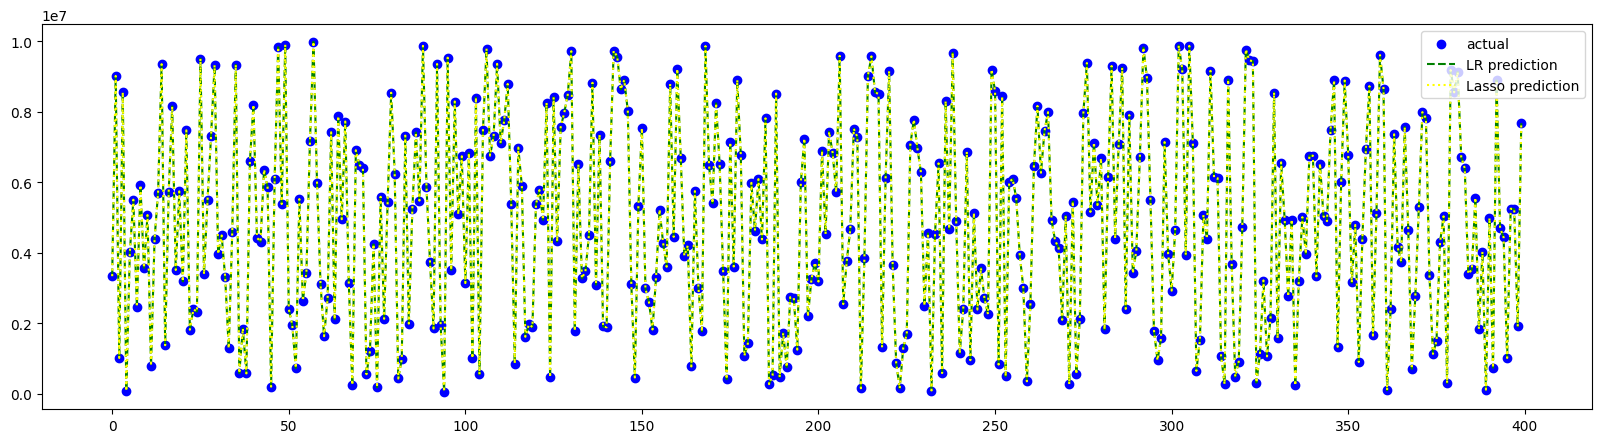

In [47]:
# Get the first 100 rows of the DataFrame
df_results_head = df_results.head(400)

# Plot the graph
plt.figure(figsize=(20, 5))
data_len = df_results_head["data_len"]
plt.scatter(data_len, df_results_head["price"], color="blue", label="actual")
plt.plot(data_len, df_results_head["LR prediction"], color="green", linestyle="--", label="LR prediction")
plt.plot(data_len, df_results_head["Lasso prediction"], color="yellow", linestyle=":", label="Lasso prediction")
plt.legend()
plt.show()

## Kesimpulan

Silahkan jawab pertanyaan berikut pada cell markdown yang sudah disediakan:

**Klasifikasi**

1. Apa saja feature-feature yang relevan untuk membedakan antara rumah basic, middle, dan luxury?

2. Model classifier apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

4. Dari hasil Confusion Matrix dan Classification Report, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?

**Regresi**

1. Model regressor apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

4. Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?

*tulis jawaban kalian di cell ini*

Kelompok: 8
Bonaventura Octavito Cahyawan / 210711233
Rafael Billy / 210711297
Sabastian Gautama / 210711172
Theo Benito Adiana / 210711301

Jawaban:

**Klasifikasi**

**1.  feature-feature yang relevan untuk membedakan antara rumah basic, middle, dan luxury**

Dari hasil modeling, feature-feature yang relevan untuk membedakan antara rumah basic, middle, dan luxury adalah:

Squaremeters, HasYard, HasPool, IsNewBuilt

Feature-feature ini dipilih oleh model KNN dan Gradient Boosting karena dianggap paling relevan untuk membedakan antara rumah basic, middle, dan luxury.

Model KNN dan Gradient Boosting dapat mencapai akurasi yang tinggi dalam membedakan antara rumah basic, middle, dan luxury, yaitu masing-masing 99,77% dan 99,97%. Hal ini menunjukkan bahwa feature-feature yang dipilih oleh kedua model tersebut sangat relevan untuk membedakan antara rumah basic, middle, dan luxury.


**2 Model classifier apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?**


Berdasarkan hasil modeling, model classifier yang memiliki performa paling baik terhadap dataset adalah Gradient Boosting Classifier. Model ini mencapai akurasi sebesar 99,97% pada data uji.

Parameter setting yang paling optimal dari model Gradient Boosting Classifier adalah:

feat_select__k: 4

clf__n_estimators: 150

clf__learning_rate: 0.01

feat_select: SelectFromModel(estimator=DecisionTreeClassifier(random_state=97),max_features=10)]

Parameter setting ini dipilih berdasarkan hasil tuning parameter yang dilakukan menggunakan GridSearchCV.

**3 Dari hasil Confusion Matrix dan Classification Report, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?**

Dari hasil Confusion Matrix dan Classification Report, dapat disimpulkan bahwa model Gradient Boosting Classifier (GBT) memiliki performa yang lebih baik daripada model K-Nearest Neighbors (KNN). Kedua model memiliki akurasi yang sangat tinggi, yaitu 100%, tetapi model GBT memiliki nilai precision, recall, dan f1-score yang lebih tinggi untuk semua kelas.

alasan mengapa model GBT memiliki performa yang lebih baik daripada model KNN:

Model GBT lebih kompleks daripada model KNN dan dapat belajar pola yang lebih kompleks dalam data.

Model GBT lebih baik dalam menghindari overfitting karena menggunakan metode regularisasi.

Model GBT lebih baik dalam menangani data yang tidak seimbang (imbalanced data), yaitu data yang memiliki jumlah data yang berbeda untuk setiap kelas.

**Regresi**

**1 Model regressor apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?**

Model regressor yang memiliki performa paling baik terhadap dataset adalah Lasso Regression dengan parameter alpha=10. Model ini memiliki MAE, MSE, dan RMSE yang lebih rendah daripada model Linear Regression.

Parameter setting yang paling optimal dari model Lasso Regression adalah:

alpha: 10
Parameter alpha mengontrol tingkat regularisasi L1. Nilai alpha yang lebih tinggi akan menghasilkan model yang lebih jarang dan dapat mengurangi overfitting.


**2 Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?**

Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, dapat disimpulkan bahwa model Lasso Regression memiliki performa yang lebih baik daripada model Linear Regression. Hal ini terlihat dari nilai MAE, MSE, dan RMSE yang lebih rendah dari model Lasso Regression.

Berdasarkan hasil prediksi, model Lasso Regression dapat memprediksi harga rumah dengan akurasi yang lebih tinggi. Hal ini terlihat dari grafik regresi yang lebih rapat dengan data aktual.

Berdasarkan hasil analisis, dapat disimpulkan bahwa model Lasso Regression lebih baik dalam memprediksi harga rumah karena beberapa alasan berikut:

Model Lasso Regression menggunakan metode regularisasi L1, yang dapat mengurangi overfitting. Overfitting terjadi ketika model terlalu cocok dengan data pelatihan dan tidak dapat generalize ke data baru.
Model Lasso Regression dapat memprediksi harga rumah dari berbagai macam fitur, termasuk fitur yang tidak linier.
Secara keseluruhan, model Lasso Regression merupakan model yang lebih baik untuk memprediksi harga rumah. Model ini dapat digunakan untuk memberikan estimasi harga rumah yang lebih akurat.

Berikut adalah beberapa hal yang dapat dilakukan untuk meningkatkan performa model Lasso Regression:

Meningkatkan jumlah fitur yang digunakan.
Memilih nilai alpha yang optimal.
Melakukan tuning parameter lainnya, seperti penalty, solver, dan max_iter.
Dengan melakukan langkah-langkah tersebut, performa model Lasso Regression dapat ditingkatkan lebih lanjut.